#Definição do Problema

Entender, através de análise exploratória dos dados, quais variáveis (localização, n° de dormitórios, etc..) tem a maior correlação com os preços de aluguel e condomínio.

https://www.kaggle.com/juxwzera/predictions-for-price

## 1 - Obtendo arquivos e bibliotecas

In [1]:
# versão do python utilziada na análise
from platform import python_version
print (python_version())

3.7.10


In [2]:
#importando bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#importando arquivo - comando funciona apenas no google colab
from google.colab import files
file = files.upload()

Saving sao-paulo-properties-april-2019.csv to sao-paulo-properties-april-2019.csv


In [4]:
#transformando o csv em um dataframe do pandas
df = pd.read_csv("sao-paulo-properties-april-2019.csv")

## 2 - Primeiras análises: verificando a situação dos dados

In [5]:
#obtendo o nome de todas as colunas
df.columns

Index(['Price', 'Condo', 'Size', 'Rooms', 'Toilets', 'Suites', 'Parking',
       'Elevator', 'Furnished', 'Swimming Pool', 'New', 'District',
       'Negotiation Type', 'Property Type', 'Latitude', 'Longitude'],
      dtype='object')

In [6]:
#procurando valores nulos nos dados
df.isnull().sum()

Price               0
Condo               0
Size                0
Rooms               0
Toilets             0
Suites              0
Parking             0
Elevator            0
Furnished           0
Swimming Pool       0
New                 0
District            0
Negotiation Type    0
Property Type       0
Latitude            0
Longitude           0
dtype: int64

In [7]:
#verificando os tipos de dados das variaveis
df.dtypes

Price                 int64
Condo                 int64
Size                  int64
Rooms                 int64
Toilets               int64
Suites                int64
Parking               int64
Elevator              int64
Furnished             int64
Swimming Pool         int64
New                   int64
District             object
Negotiation Type     object
Property Type        object
Latitude            float64
Longitude           float64
dtype: object

In [8]:
#verificando o tamanho da planiha
df.shape

(13640, 16)

In [9]:
#dados descritivos
df.describe()

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,Latitude,Longitude
count,1.364000e+04,13640.000000,13640.000000,13640.000000,13640.000000,13640.000000,13640.000000,13640.000000,13640.000000,13640.00000,13640.000000,13640.000000,13640.000000
mean,2.877378e+05,689.882331,84.373900,2.312023,2.073680,0.980792,1.393182,0.354179,0.146774,0.51217,0.015616,-22.077047,-43.597088
std,5.908214e+05,757.649363,58.435676,0.777461,0.961803,0.834891,0.829932,0.478281,0.353894,0.49987,0.123988,5.866633,11.487288
min,4.800000e+02,0.000000,30.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,-46.749039,-58.364352
25%,1.858750e+03,290.000000,50.000000,2.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000,-23.594552,-46.681671
50%,8.100000e+03,500.000000,65.000000,2.000000,2.000000,1.000000,1.000000,0.000000,0.000000,1.00000,0.000000,-23.552813,-46.637255
75%,3.600000e+05,835.000000,94.000000,3.000000,2.000000,1.000000,2.000000,1.000000,0.000000,1.00000,0.000000,-23.517640,-46.560040
max,1.000000e+07,9500.000000,880.000000,10.000000,8.000000,6.000000,9.000000,1.000000,1.000000,1.00000,1.000000,0.000000,0.000000


In [10]:
#um overview dos dados...
df.head(20)

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,District,Negotiation Type,Property Type,Latitude,Longitude
0,930,220,47,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.543138,-46.479486
1,1000,148,45,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.550239,-46.480718
2,1000,100,48,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.542818,-46.485665
3,1000,200,48,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.547171,-46.483014
4,1300,410,55,2,2,1,1,1,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.525025,-46.482436
5,1170,0,50,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.548751,-46.477195
6,1000,180,52,1,2,1,1,1,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.549840,-46.484137
7,900,150,40,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.539740,-46.492670
8,1000,0,65,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.548751,-46.477195
9,1000,0,100,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.548751,-46.477195


## 3 - Analise exploratória: uma visão geral dos dados

### a) Quais são os tipos de imóveis disponíveis no dataframe?

In [11]:
df['Property Type'].unique()

array(['apartment'], dtype=object)

### b) Esses imóveis estão disponíveis para quais tipos de negociação?

In [12]:
df['Negotiation Type'].unique()

array(['rent', 'sale'], dtype=object)

### c) Esses imóveis estão disponíveis em quais bairros?



In [13]:
df['District'].unique()

array(['Artur Alvim/São Paulo', 'Belém/São Paulo', 'Cangaíba/São Paulo',
       'Carrão/São Paulo', 'Cidade Líder/São Paulo',
       'Cidade Tiradentes/São Paulo', 'Ermelino Matarazzo/São Paulo',
       'Iguatemi/São Paulo', 'Itaim Paulista/São Paulo',
       'Itaquera/São Paulo', 'Jardim Helena/São Paulo',
       'José Bonifácio/São Paulo', 'Lajeado/São Paulo',
       'Parque do Carmo/São Paulo', 'Penha/São Paulo',
       'Ponte Rasa/São Paulo', 'Sapopemba/São Paulo',
       'São Lucas/São Paulo', 'São Mateus/São Paulo',
       'São Miguel/São Paulo', 'São Rafael/São Paulo',
       'Tatuapé/São Paulo', 'Vila Curuçá/São Paulo',
       'Vila Formosa/São Paulo', 'Vila Jacuí/São Paulo',
       'Vila Matilde/São Paulo', 'Vila Prudente/São Paulo',
       'Cambuci/São Paulo', 'Campo Belo/São Paulo',
       'Campo Grande/São Paulo', 'Campo Limpo/São Paulo',
       'Capão Redondo/São Paulo', 'Cidade Ademar/São Paulo',
       'Cidade Dutra/São Paulo', 'Cursino/São Paulo', 'Grajaú/São Paulo',
  

### Algumas colunas estão trazendo variáveis booleanas. É necessário garantir que seus valores são apenas '0' (falso) ou '1' (verdadeiro). Esse informação será importante tanto para as análises exploratórias quanto para um futuro modelo de Machine Learning. Portanto:

### d) Verificação dos valores booleanos nas colunas 'elevator','furnished' and 'new':

In [14]:
df['Elevator'].unique()

array([0, 1])

In [15]:
df['Furnished'].unique()

array([0, 1])

In [16]:
df['New'].unique()

array([0, 1])

## 4 - De volta à preparação dos dados: separando imóveis

---



a) Comparação entre quantidade de móveis em aluguel e à venda:



Text(0.5, 0, 'Status')

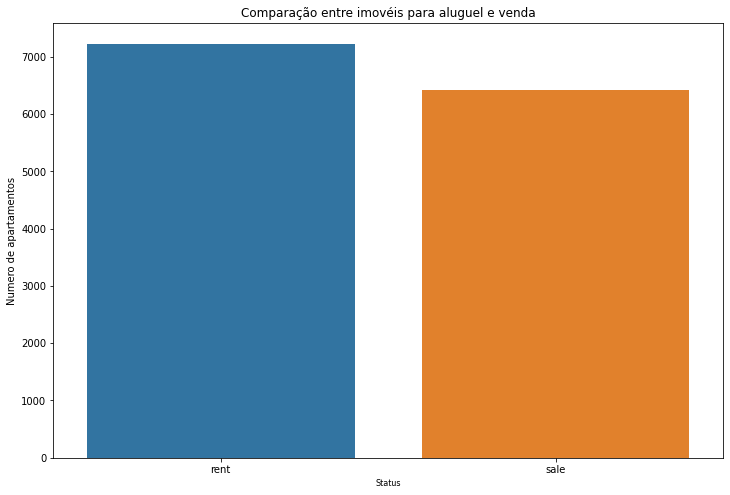

In [17]:
plt.figure(figsize=(12,8))
ax = sns.countplot(x = "Negotiation Type", data = df)
ax.set_title("Comparação entre imovéis para aluguel e venda")
ax.set_ylabel("Numero de apartamentos")
ax.set_xlabel("Status", fontsize = 8)

b) Analisar a diferença entre preços de aluguel e venda

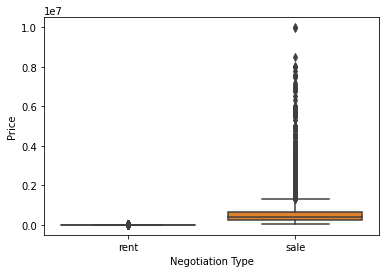

In [18]:
sns.boxplot(x = "Negotiation Type", y = "Price", data = df)

Neste trabalho, iremos nos preocupar apenas com os imóveis em aluguel. Desta forma, teremos que fazer o split de dados, separando em dois datasets os imóveis à venda e em aluguel:

In [19]:
df_rent = df[df["Negotiation Type"] == 'rent'] #dataframe com apês para alugar
df_sale = df[df['Negotiation Type'] == 'sale'] #dataframe com apês à venda

Agora, vamos chamar o head() apenas para confirmar que tudo deu certo:

In [20]:
df_rent.head()

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,District,Negotiation Type,Property Type,Latitude,Longitude
0,930,220,47,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.543138,-46.479486
1,1000,148,45,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.550239,-46.480718
2,1000,100,48,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.542818,-46.485665
3,1000,200,48,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.547171,-46.483014
4,1300,410,55,2,2,1,1,1,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.525025,-46.482436


In [21]:
df_rent['Negotiation Type'].unique()

array(['rent'], dtype=object)

In [22]:
df_sale.head()

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,District,Negotiation Type,Property Type,Latitude,Longitude
4901,732600,1000,74,1,2,1,2,1,0,1,0,Vila Madalena/São Paulo,sale,apartment,-23.552129,-46.692244
4902,1990000,2400,164,4,5,2,3,1,1,1,0,Vila Madalena/São Paulo,sale,apartment,-23.551613,-46.699106
4903,720000,700,70,2,2,1,1,1,0,1,1,Vila Madalena/São Paulo,sale,apartment,-23.547687,-46.692594
4904,1680000,1580,155,3,5,3,2,1,0,1,0,Vila Madalena/São Paulo,sale,apartment,-23.552590,-46.691104
4905,1200000,900,56,2,2,1,2,0,1,1,0,Vila Madalena/São Paulo,sale,apartment,-23.553087,-46.697890


In [23]:
df_sale['Negotiation Type'].unique()

array(['sale'], dtype=object)

Tudo ok!


## 5. Análise exploratória: Imóveis para alugar

O objetivo é entender quais variáveis mais interferem no preço do imóvel.
Temos algumas hipóteses sobre quais fatores mais interferem:


*   Tamanho do apê
*   Nº de quartos
*   Nº de banheiros
*   Nº de suítes
*   Nº de vagas no estacionamento
*   Elevador no prédio
*   Imóvel mobiliado
*   Piscina no condomínio
*   Imóvel novo/usado
*   Bairro

Agora, vamos investigá-las, uma a uma.









### 5.1 Tamanho do apartamento



Primeiro, vamos dar uma olhada nos dados descritivos da coluna Size:

In [24]:
df_rent['Size'].describe()

count    7228.000000
mean       89.486165
std        63.976416
min        30.000000
25%        52.000000
50%        67.000000
75%       100.000000
max       880.000000
Name: Size, dtype: float64

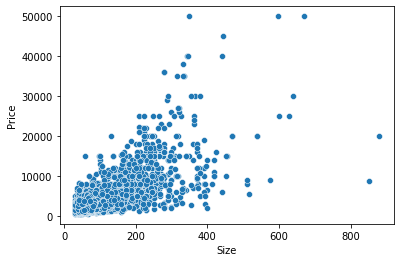

In [25]:
sns.scatterplot(x = 'Size', y = 'Price', data = df_rent)

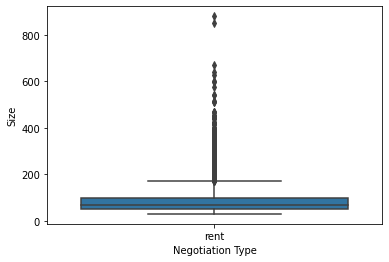

In [26]:
sns.boxplot(x = "Negotiation Type", y = "Size", data = df_rent)

É clara a presença de outliers que vão atrapalhar a nossa análise. Vamos dar um jeito nisso.

Mais uma olhada nos dados descritivos da tabela de alugueis

In [27]:
df_rent.describe()

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,Latitude,Longitude
count,7228.000000,7228.000000,7228.000000,7228.000000,7228.000000,7228.000000,7228.000000,7228.000000,7228.000000,7228.000000,7228.000000,7228.000000,7228.000000
mean,3077.669065,825.194798,89.486165,2.304234,2.105562,1.024488,1.452269,0.299806,0.172939,0.487963,0.000830,-22.032278,-43.500873
std,3522.830284,835.621937,63.976416,0.829108,0.998162,0.884241,0.889535,0.458205,0.378220,0.499890,0.028802,5.962534,11.675070
min,480.000000,0.000000,30.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-46.749039,-58.364352
25%,1350.000000,395.750000,52.000000,2.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-23.598066,-46.689788
50%,2000.000000,595.000000,67.000000,2.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-23.555869,-46.644793
75%,3300.000000,990.000000,100.000000,3.000000,2.000000,1.000000,2.000000,1.000000,0.000000,1.000000,0.000000,-23.522756,-46.585110
max,50000.000000,9500.000000,880.000000,10.000000,8.000000,5.000000,9.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000


Agora, eliminar os outliers.
É considerado outlier:


*   Limite (outlier) superior = 150% do valor do interquartilico somado ao 3º quartil
*   Limite inferior = 150% do valor do interquartilico diminuido ao 1º quartil
 Onde interquartilico = 3º quartil - 1º quartil

In [28]:
#vamos definir alguns valores
primeiro_quartil = df_rent['Size'].quantile(q = 0.25)
mediana = df_rent['Size'].quantile(q = 0.5)
terceiro_quartil = df_rent['Size'].quantile(q = 0.75)
interquartilico = terceiro_quartil - primeiro_quartil
interquartilico

48.0

Uma vez obtido os valores, vamos definir os limites superior e inferior

In [29]:
limite_superior = (terceiro_quartil + 1.5*interquartilico) + mediana
limite_superior

239.0

In [30]:
limite_inferior = (primeiro_quartil - 1.5*interquartilico) + mediana
limite_inferior

47.0

E, uma vez obtido os limites superior e inferior, vamos fazer mais um split dos dados, mantendo apenas registros dentro dos limites.

In [31]:
df_rent_semoutiliers = df_rent[df_rent['Size'] < limite_superior]

In [32]:
df_rent_semoutiliers = df_rent_semoutiliers[df_rent_semoutiliers['Size'] > limite_inferior]

Comparando os dados descritivos do dataset apos o split. Detalhe para a mudança nas estatísticas de media, mediana, mínimo e máximo, tanto na coluna de tamanho quanto na de preço.

In [33]:
df_rent.describe()

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,Latitude,Longitude
count,7228.000000,7228.000000,7228.000000,7228.000000,7228.000000,7228.000000,7228.000000,7228.000000,7228.000000,7228.000000,7228.000000,7228.000000,7228.000000
mean,3077.669065,825.194798,89.486165,2.304234,2.105562,1.024488,1.452269,0.299806,0.172939,0.487963,0.000830,-22.032278,-43.500873
std,3522.830284,835.621937,63.976416,0.829108,0.998162,0.884241,0.889535,0.458205,0.378220,0.499890,0.028802,5.962534,11.675070
min,480.000000,0.000000,30.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-46.749039,-58.364352
25%,1350.000000,395.750000,52.000000,2.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-23.598066,-46.689788
50%,2000.000000,595.000000,67.000000,2.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-23.555869,-46.644793
75%,3300.000000,990.000000,100.000000,3.000000,2.000000,1.000000,2.000000,1.000000,0.000000,1.000000,0.000000,-23.522756,-46.585110
max,50000.000000,9500.000000,880.000000,10.000000,8.000000,5.000000,9.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000


In [34]:
df_rent_semoutiliers.describe()

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,Latitude,Longitude
count,5933.000000,5933.000000,5933.000000,5933.000000,5933.000000,5933.000000,5933.000000,5933.000000,5933.000000,5933.000000,5933.000000,5933.000000,5933.000000
mean,2836.506321,782.803304,87.599865,2.409236,2.092533,1.004214,1.441429,0.304062,0.161975,0.492668,0.000337,-22.088279,-43.628647
std,2481.370852,617.853314,42.794831,0.704763,0.909065,0.793272,0.769980,0.460048,0.368459,0.499988,0.018359,5.845300,11.459536
min,480.000000,0.000000,48.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-46.749039,-58.364352
25%,1400.000000,420.000000,58.000000,2.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-23.598029,-46.692906
50%,2000.000000,611.000000,70.000000,2.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-23.555913,-46.645620
75%,3300.000000,1000.000000,103.000000,3.000000,2.000000,1.000000,2.000000,1.000000,0.000000,1.000000,0.000000,-23.521645,-46.585479
max,25000.000000,6059.000000,238.000000,5.000000,7.000000,4.000000,9.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000


Agora, vamos plotar outro scaterplot, usando como base a planilha sem outliers

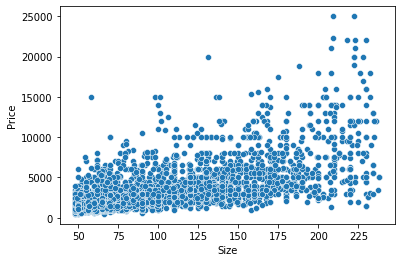

In [35]:
sns.scatterplot(x = 'Size', y = 'Price', data = df_rent_semoutiliers)

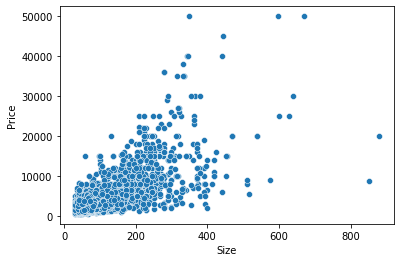

In [36]:
sns.scatterplot(x = 'Size', y = 'Price', data = df_rent)

Para verificar de maneira mais clara a correlação, vamos usar o jointplot:


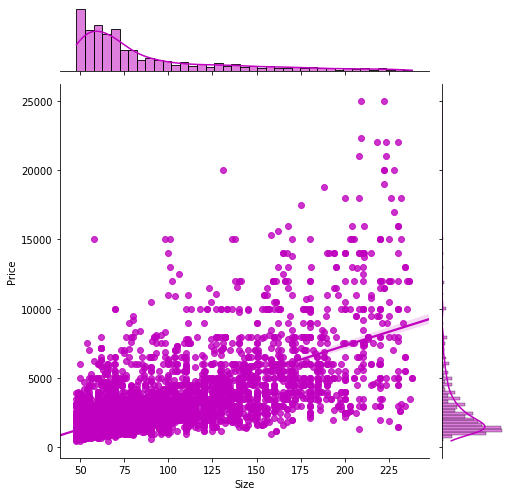

In [37]:
g = sns.jointplot(x="Size", y="Price", data=df_rent_semoutiliers,
                  kind="reg", truncate=False,
                  color="m", height=7)
#xlim=(0, 60), ylim=(0, 12),

In [38]:
df_rent_semoutiliers['Size'].corr(df_rent_semoutiliers['Price'])

0.6915001410300965

Aqui a correlação positiva entre preço e tamanho fica bem clara. Os histogramas auxiliares mostram, também, que a maior concentração de preços está na faixa entre 2k e 3k, enquanto a maior concentração de tamanho está entre 50 e 75 m2.

##### Mas podemos ir além e usar um mapa de calor para verificar a correlação entre todas as variáveis e o preço.

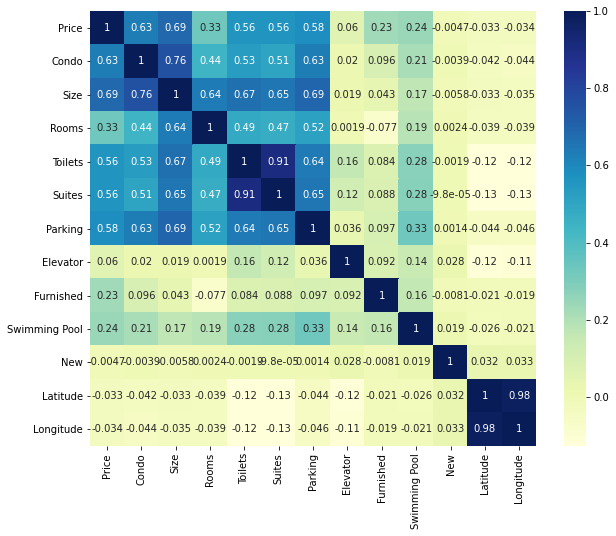

In [42]:
plt.figure(figsize = (10,8))
corr = df_rent_semoutiliers.corr()
sns.heatmap(corr, cmap = 'YlGnBu', annot= True);

Aqui nós já temos algumas respostas: as variáveis com maior correlação ao preço de aluguel são as de tamanho do imóvel, preço do condomínio, vaga de garagem, qtde. de banheiros e suítes, embora não tenhamos tido nenhuma variável apresentando forte correlação (superior a 0,7).

Mas, por ser uma variável categórica, a localidade do imóvel não entrou na análise anterior, e acredito que esta é uma variável importante. 

Desta forma, abaixo elencamos as maiores e menores medianas de preço por bairro:

In [63]:
dinamica_distrito = pd.pivot_table(df_rent_semoutiliers, values=['Price'], index=['District'], aggfunc={'Price': np.mean})
dinamica_distrito.sort_values(by = ['Price'], ascending = False)

,Price
District,
Itaim Bibi/São Paulo,7660.679612
Iguatemi/São Paulo,7420.789474
Vila Olimpia/São Paulo,6625.032258
Moema/São Paulo,6559.194915
Campo Belo/São Paulo,6456.055556
...,...
Artur Alvim/São Paulo,975.750000
Guaianazes/São Paulo,970.833333
José Bonifácio/São Paulo,950.707317


Abaixo, aplicamos um boxplot para cada bairro, ordenando a variação por preço. Assim, fica bem evidente considerável variância nos bairros com a mediana de valor mais alta, comprovando uma relação entre as variáveis. NOs bairros mais caros da cidade, é até possível encontrar preços "razoáveis", mas a incidência de preços bem acima da média é bem maior que em bairros mais baratos, que também apresentam uma margem bem menor de preços.

Text(0.5, 0, 'Price')

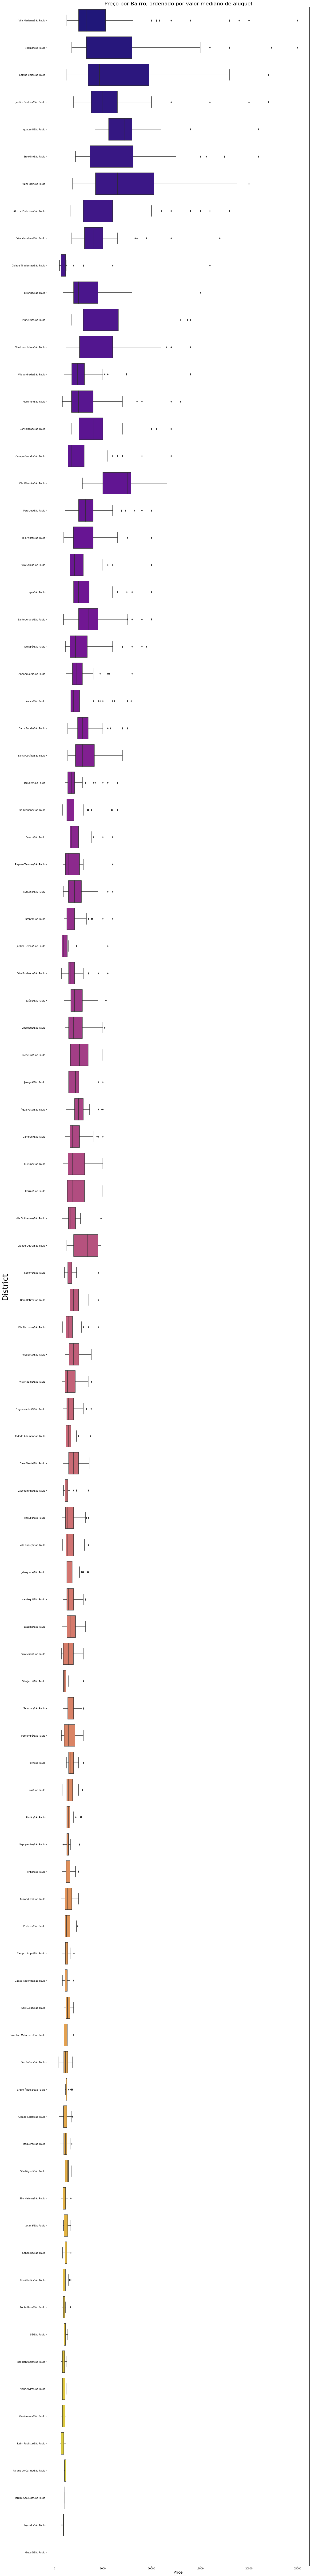

In [65]:
plt.figure(figsize =(20,200))
ax = sns.boxplot(y = 'District', x = 'Price', orient='h', data = df_rent_semoutiliers.sort_values(by = ['Price'], ascending=False), palette = 'plasma')

ax.set_title('Preço por Bairro, ordenado por valor mediano de aluguel', fontsize = 22)
ax.set_ylabel('District', fontsize = 32)
ax.set_xlabel('Price', fontsize = 16)

##6. Conclusão

Ao analisar os dados, pudemos confirmar que nenhuma das variáveis apresenta forte correlação (> 0,7) com o preço de aluguel dos imóveis. Porém as maiores correlações são: 

*   Tamanho do imóvel
*   Preço do condomínio
*   Vaga de garagem
*   Qtde de banheiros
*   Qtde de suítes

Algumas variáveis como presença de elevadore e piscina no condomínio se mostraram irrelevantes para definir o preço de aluguel do imóvel.

A falta de uma correlação forte entre as variáveis numéricas aponta para a possíbilidade de que a localidade do imóvel seja o principal fator que pesa no preço. Na análise foi possível ver a discrepência da margem de preços entre os bairros mais caros e mais baratos.

Para continuidade do trabalho, é possível realizar a mesma análise com os imóveis à venda e/ou pensar em modelos de Machine Learning para sugerir o preço do imóvel de acordo com as variáveis informadas pelo usuário.
